1️⃣ Veri Seti Neyi Anlatıyor? (Big Picture)

Bu veri, bir bankanın müşterilerine yaptığı pazarlama aramalarını temsil ediyor.

📞 Banka, müşterileri telefonla arayarak bir ürün (genelde vadeli mevduat / term deposit) sunuyor.
🎯 Amaç:

Hangi müşteri bu teklifi kabul eder?

Banka herkesi aramak istemiyor çünkü:

Arama maliyetli

Müşteri rahatsızlığı var

Düşük dönüş = boşa harcanan bütçe

👉 İşte burada makine öğrenmesi devreye giriyor.
Tahmin etmeye çalıştığın şey:

“Bu müşteri aranırsa ürünü satın alır mı?”

Bir banka, pazarlama kampanyalarında doğru müşteriyi hedefleyerek
arama maliyetlerini düşürmek ve
dönüşüm oranını artırmak istiyor.

Elimizde geçmiş kampanyalara ait müşteri bilgileri ve arama sonuçları var.
Bu veriyi kullanarak, hangi müşterinin teklifi kabul edeceğini önceden tahmin eden
bir makine öğrenmesi modeli geliştiricez

In [1]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../data/train.csv")

In [3]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [4]:
##age
# Müşterinin yaşıdır.
# Farklı yaş gruplarının bankacılık ürünlerine ilgisi değişebileceği için önemli bir demografik değişkendir.

# job:
# Müşterinin meslek bilgisini ifade eder (technician, blue-collar, student vb.).
# Gelir seviyesi ve finansal davranışlar hakkında dolaylı bilgi sağlar.

# marital:
# Müşterinin medeni durumunu gösterir (single, married, divorced).
# Medeni durum, finansal sorumluluklar ve tasarruf eğilimi ile ilişkili olabilir.

# education:
# Müşterinin eğitim seviyesini belirtir (primary, secondary, tertiary).
# Eğitim seviyesi, finansal farkındalık ve yatırım ürünlerine yaklaşımı etkileyebilir.

# default:
# Müşterinin daha önce kredi borcunu ödeyememe (temerrüt) durumu olup olmadığını gösterir.
# Finansal risk değerlendirmesi açısından kritik bir değişkendir.

# balance:
# Müşterinin banka hesabındaki ortalama bakiyesini temsil eder.
# Yüksek bakiye, yatırım veya mevduat ürünlerine daha yatkınlık gösterebilir.

# housing:
# Müşterinin konut kredisi (mortgage) olup olmadığını belirtir.
# Mevcut borç yükü, yeni ürünlere olan ilgiyi etkileyebilir.

# loan:
# Müşterinin kişisel krediye sahip olup olmadığını gösterir.
# Kredi durumu, müşterinin finansal esnekliği hakkında bilgi verir.

# contact:
# Bankanın müşteriyle hangi iletişim kanalı üzerinden temas kurduğunu gösterir
# (cellular, telephone, unknown).
# İletişim kanalı, kampanya başarısını doğrudan etkileyebilir.

# day:
# Pazarlama aramasının yapıldığı ayın gününü ifade eder.
# Zamanlama etkisini analiz etmek için kullanılabilir.

# month:
# Pazarlama aramasının yapıldığı ayı gösterir.
# Mevsimsellik ve dönemsel kampanya etkilerinin analizinde önemlidir.

# Banka ile müşteri arasındaki görüşmenin süresini saniye cinsinden ifade eder.
# Genellikle müşteri ilgisinin güçlü bir göstergesidir.
# (Not: Arama sonrası oluştuğu için bazı senaryolarda veri sızıntısı riski taşır.)

# campaign:
# Bu kampanya süresince müşterinin kaç kez arandığını gösterir.
# Çok fazla arama, müşteri rahatsızlığına yol açarak dönüşüm oranını düşürebilir.

# pdays:
# Müşterinin önceki kampanyadan sonra kaç gün geçtiğini belirtir.
# -1 değeri, müşterinin daha önce hiç aranmadığını ifade eder.

# previous:
# Önceki pazarlama kampanyalarında müşteriyle kaç kez iletişime geçildiğini gösterir.
# Müşterinin geçmiş etkileşim düzeyini yansıtır.

# poutcome:
# Önceki pazarlama kampanyasının sonucunu gösterir
# (success, failure, unknown).
# Geçmiş kampanya sonucu, mevcut kampanya başarısını etkileyebilir.

# y:
# Hedef (target) değişkendir.
# Müşterinin bankanın sunduğu ürünü kabul edip etmediğini gösterir.
# 1: Ürünü kabul etti
# 0: Ürünü kabul etmedi

In [5]:
df["default"].value_counts()

default
no     737151
yes     12849
Name: count, dtype: int64

In [6]:
df.tail()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0
749999,749999,42,technician,married,secondary,no,1559,no,no,cellular,4,aug,143,1,1,7,failure,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [9]:
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [10]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [12]:
df.corr(numeric_only=True)


,id,age,balance,day,duration,campaign,pdays,previous,y
id,1.000000,-0.000223,-0.000282,-0.001692,0.000925,0.000646,-0.000551,0.000135,0.000615
age,-0.000223,1.000000,0.062838,-0.015179,-0.004388,0.002052,-0.021635,0.004541,0.009523
balance,-0.000282,0.062838,1.000000,-0.008269,0.109629,-0.027744,0.010040,0.033897,0.122513
day,-0.001692,-0.015179,-0.008269,1.000000,-0.056755,0.178806,-0.086197,-0.051082,-0.049625
duration,0.000925,-0.004388,0.109629,-0.056755,1.000000,-0.083016,0.047555,0.040105,0.519283
campaign,0.000646,0.002052,-0.027744,0.178806,-0.083016,1.000000,-0.061465,-0.026707,-0.075829
pdays,-0.000551,-0.021635,0.010040,-0.086197,0.047555,-0.061465,1.000000,0.561839,0.089277
previous,0.000135,0.004541,0.033897,-0.051082,0.040105,-0.026707,0.561839,1.000000,0.119552
y,0.000615,0.009523,0.122513,-0.049625,0.519283,-0.075829,0.089277,0.119552,1.000000


In [13]:
df[df["y"]==1].head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
20,20,36,technician,single,tertiary,no,3415,no,no,cellular,24,jul,867,5,-1,0,unknown,1
42,42,59,admin.,married,secondary,no,2338,no,no,cellular,10,mar,472,1,90,3,success,1
57,57,46,admin.,married,secondary,no,1527,no,no,cellular,14,aug,391,1,-1,0,unknown,1
68,68,30,services,single,secondary,no,535,no,no,cellular,20,nov,944,1,-1,0,unknown,1
74,74,54,management,married,tertiary,no,913,yes,no,cellular,3,feb,881,3,211,2,failure,1
78,78,28,student,single,unknown,no,10583,no,no,cellular,8,jun,119,8,-1,0,unknown,1
79,79,32,admin.,single,secondary,no,1228,no,no,cellular,21,nov,782,1,-1,0,unknown,1
88,88,60,technician,married,secondary,no,116,no,no,cellular,29,jul,795,2,183,4,success,1
95,95,32,blue-collar,married,primary,no,473,yes,no,unknown,7,may,707,3,-1,0,unknown,1


<Axes: xlabel='y', ylabel='duration'>

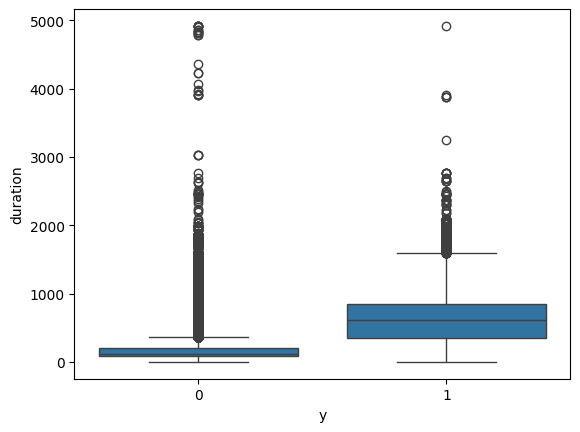

In [14]:
sns.boxplot(data=df,x="y",y="duration")

In [15]:
##Call duration, müşteri kararını yansıtan bir sonuç değişkeni niteliği taşıdığı için,
##gerçek zamanlı tahmin senaryosunda veri sızıntısı (data leakage) riski bulunmaktadır.
##Boxplot analizi, ürün kabul eden müşterilerin çağrı süresinin anlamlı şekilde daha uzun olduğunu göstermektedir.
##Bu değişken yüksek tahmin gücüne sahip olsa da, arama sonrası oluştuğu için veri sızıntısı riski taşımaktadır.

In [16]:
df=df.drop("id",axis=1)

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


Text(0.5, 0, 'Önceki Kampanya Sonucu')

<Figure size 2800x1200 with 0 Axes>

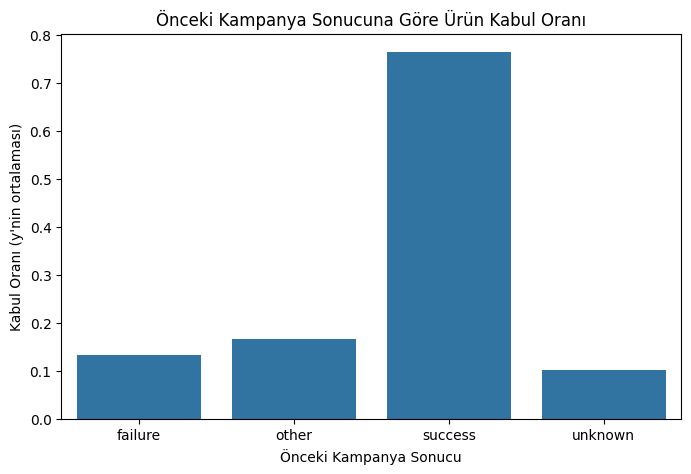

In [18]:
## Önceki kampanya sonucu önemli mi?

# Grafik stili ayarlanıyor
plt.figure(figsize=(28,12))

# Önceki kampanya sonucuna göre ürün kabul oranı hesaplanıyor
pout_mean = df.groupby("poutcome")["y"].mean().reset_index()

# Bar plot çiziliyor
plt.figure(figsize=(8,5))
sns.barplot(data=pout_mean, x="poutcome", y="y")

# Grafik başlık ve eksen isimleri
plt.title("Önceki Kampanya Sonucuna Göre Ürün Kabul Oranı")
plt.ylabel("Kabul Oranı (y'nin ortalaması)")
plt.xlabel("Önceki Kampanya Sonucu")


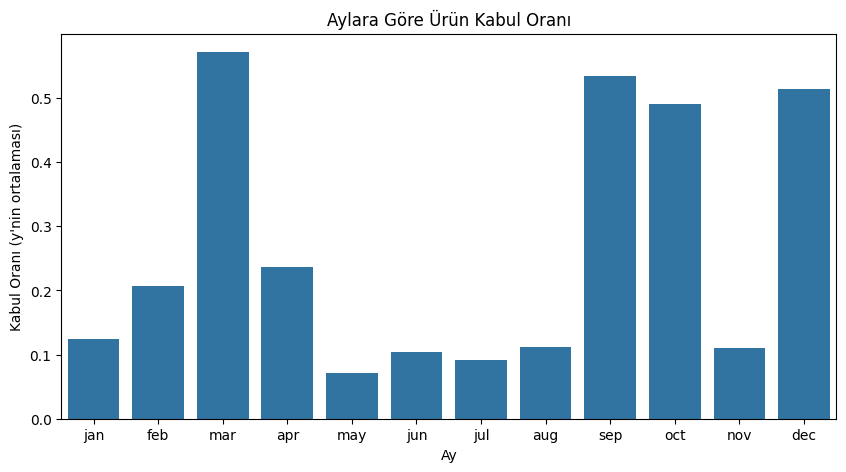

In [19]:
# Kampanya hangi aylarda daha başarılı?

# Aylara göre ürün kabul oranı hesaplanıyor
month_mean = df.groupby("month")["y"].mean().reset_index()

month_order = ["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]


plt.figure(figsize=(10,5))
sns.barplot(data=month_mean, x="month", y="y", order=month_order)

# Başlık ve eksen isimleri (Türkçe)
plt.title("Aylara Göre Ürün Kabul Oranı")
plt.ylabel("Kabul Oranı (y'nin ortalaması)")
plt.xlabel("Ay")

plt.show()

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


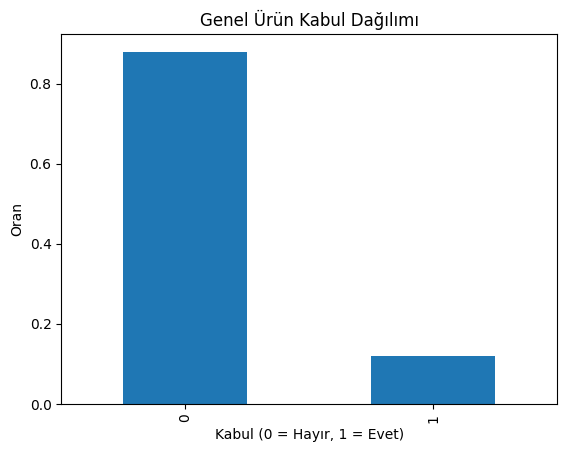

In [21]:
df["y"].value_counts(normalize=True).plot(
    kind="bar",
    title="Genel Ürün Kabul Dağılımı",
    ylabel="Oran",
    xlabel="Kabul (0 = Hayır, 1 = Evet)"
)
plt.show()

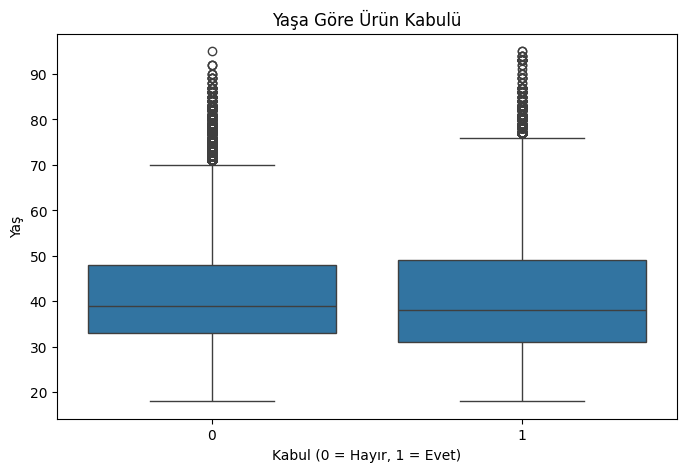

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x="y", y="age", data=df)
plt.title("Yaşa Göre Ürün Kabulü")
plt.xlabel("Kabul (0 = Hayır, 1 = Evet)")
plt.ylabel("Yaş")
plt.show()

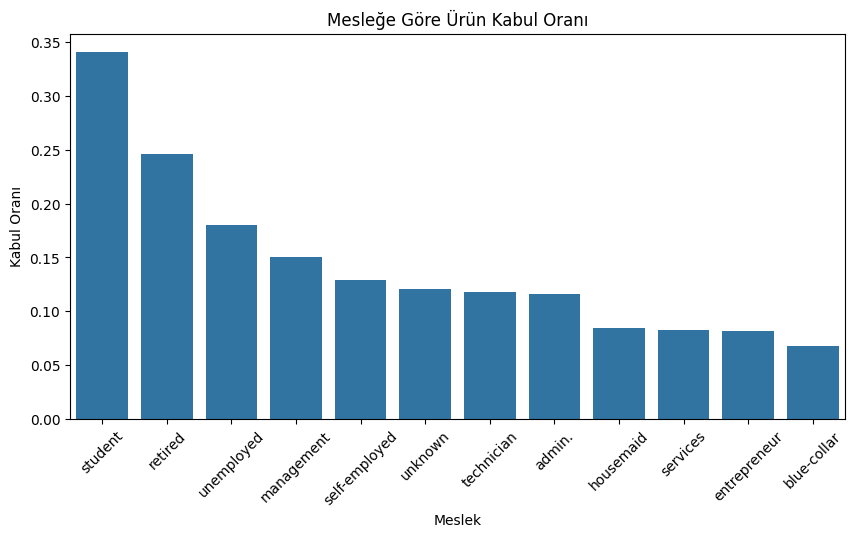

In [23]:
job_mean = df.groupby("job")["y"].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=job_mean, x="job", y="y")
plt.title("Mesleğe Göre Ürün Kabul Oranı")
plt.xlabel("Meslek")
plt.ylabel("Kabul Oranı")
plt.xticks(rotation=45)
plt.show()

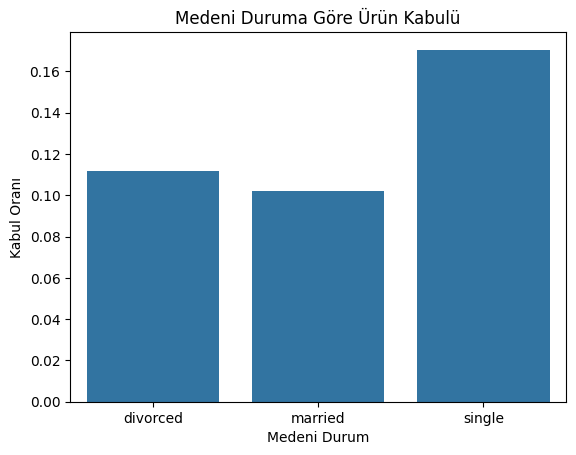

In [24]:
marital_mean = df.groupby("marital")["y"].mean().reset_index()

sns.barplot(data=marital_mean, x="marital", y="y")
plt.title("Medeni Duruma Göre Ürün Kabulü")
plt.xlabel("Medeni Durum")
plt.ylabel("Kabul Oranı")
plt.show()

In [25]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


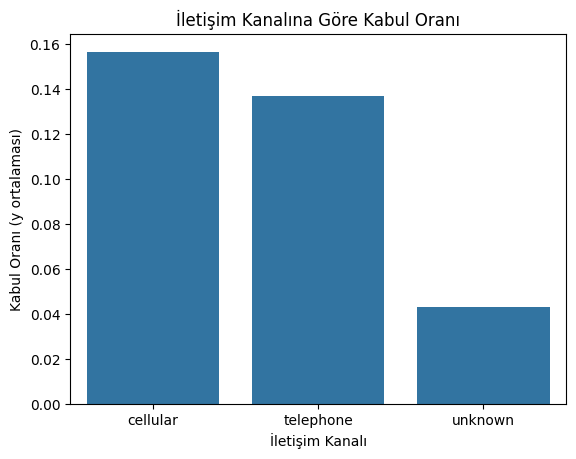

In [26]:
contact_mean = df.groupby("contact")["y"].mean().reset_index()

sns.barplot(data=contact_mean, x="contact", y="y")
plt.title("İletişim Kanalına Göre Kabul Oranı")
plt.ylabel("Kabul Oranı (y ortalaması)")
plt.xlabel("İletişim Kanalı")
plt.show()

In [27]:
df["contact"].value_counts()

contact
cellular     486655
unknown      231627
telephone     31718
Name: count, dtype: int64

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


Text(0.5, 1.0, 'Kampanya Arama Sayısına Göre Ürün Kabul Oranı')

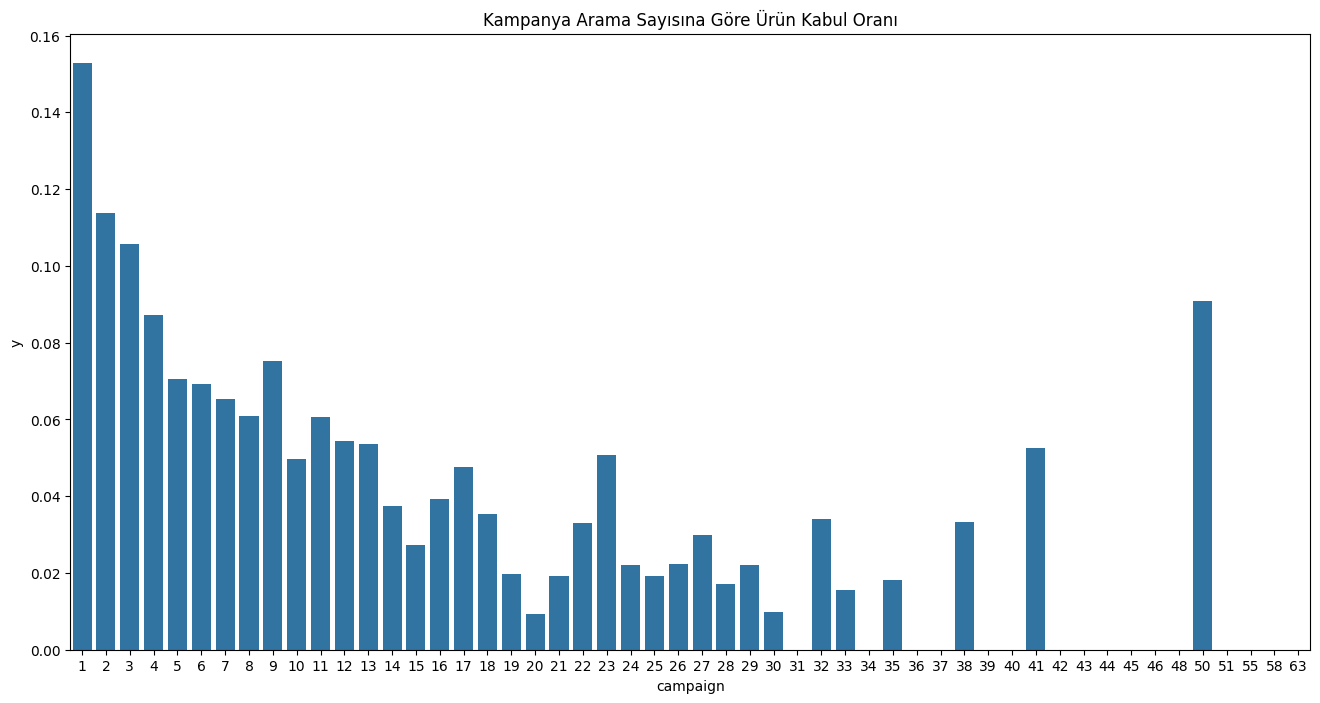

In [29]:
## campainge göre kabul oranı
campaign_mean = df.groupby("campaign")["y"].mean().reset_index()
plt.figure(figsize=(16,8))
sns.barplot(data=campaign_mean, x="campaign", y="y")
plt.title("Kampanya Arama Sayısına Göre Ürün Kabul Oranı")

In [30]:
##df = df[df["campaign"] <= 13]

Text(0.5, 1.0, 'Kampanya Arama Sayısına Göre Ürün Kabul Oranı')

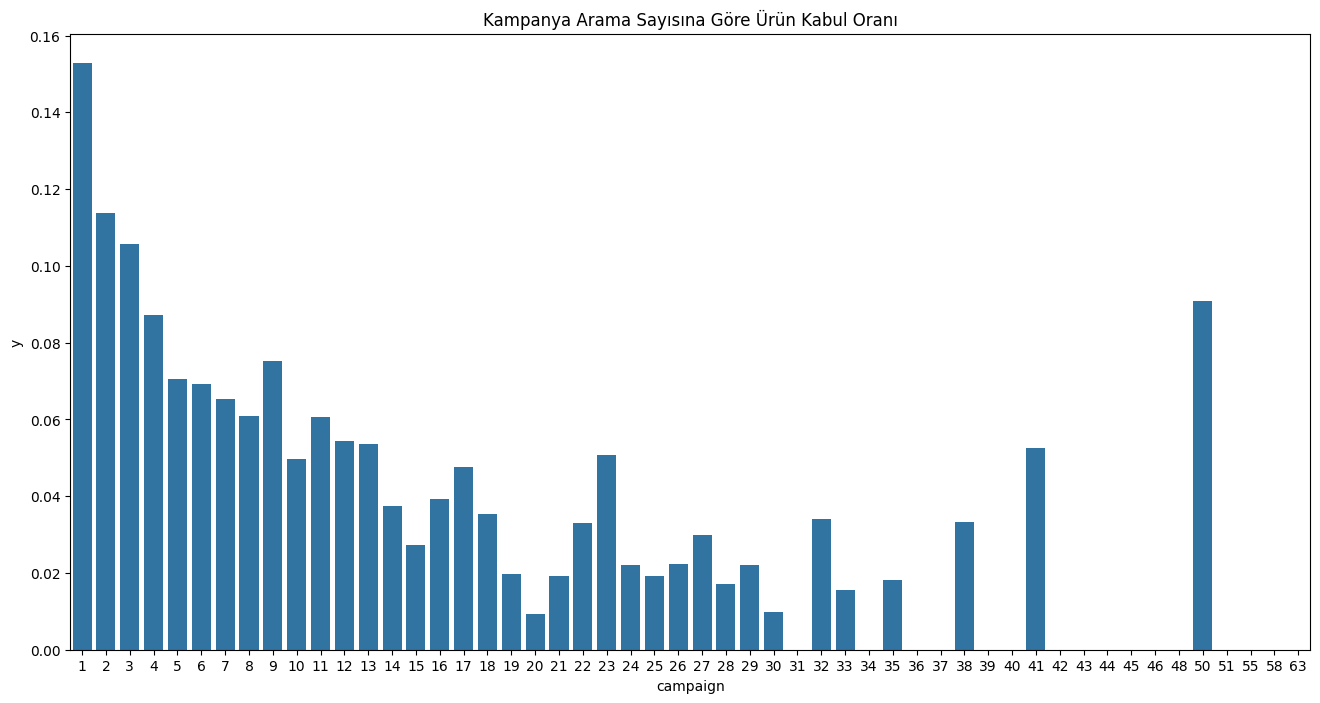

In [31]:
## campainge göre kabul oranı
campaign_mean = df.groupby("campaign")["y"].mean().reset_index()
plt.figure(figsize=(16,8))
sns.barplot(data=campaign_mean, x="campaign", y="y")
plt.title("Kampanya Arama Sayısına Göre Ürün Kabul Oranı")

In [32]:
df=df.drop("duration",axis=1)

In [33]:
df.shape

(750000, 16)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  campaign   750000 non-null  int64 
 12  pdays      750000 non-null  int64 
 13  previous   750000 non-null  int64 
 14  poutcome   750000 non-null  object
 15  y          750000 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 91.6+ MB


In [35]:
df["y"].value_counts()

y
0    659512
1     90488
Name: count, dtype: int64

In [36]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,1,-1,0,unknown,1


In [37]:
pd.DataFrame(df.value_counts())

count
age job         marital  education default balance housing loan contact   day month campaign pdays previous poutcome y       
49  technician  married  secondary no      0       no      no   cellular  19  aug   2        -1    0        unknown  0     21
50  management  married  tertiary  no      0       no      no   cellular  19  aug   2        -1    0        unknown  0     20
52  management  married  tertiary  no      0       yes     no   cellular  17  nov   1        -1    0        unknown  0     19
    technician  married  secondary no      0       no      no   cellular  19  aug   2        -1    0        unknown  0     18
49  management  married  tertiary  no      0       no      no   cellular  19  aug   2        -1    0        unknown  0     17
...                                                                                                                       ...
92  retired     married  unknown   no      0       no      no   telephone 18  mar   1        -1    0        unknown  0      1
                                           775     no      no   cellular  28  jan   3         92   3        failure  1      1
93  retired     divorced primary   no      712     no      no   cellular  18  feb   2        -1    0        unknown  1      1
                married  primary   no      2587    no      no   telephone 9   jun   3        -1    0        unknown  1      1
18  blue-collar single   primary   no      0       yes     no   unknown   16  jun   15       -1    0        unknown  0      1

[729362 rows x 1 columns]

In [38]:
df["poutcome"].value_counts()

poutcome
unknown    672450
failure     45115
success     17691
other       14744
Name: count, dtype: int64

In [39]:
target_mean = df.groupby("poutcome")["y"].mean()

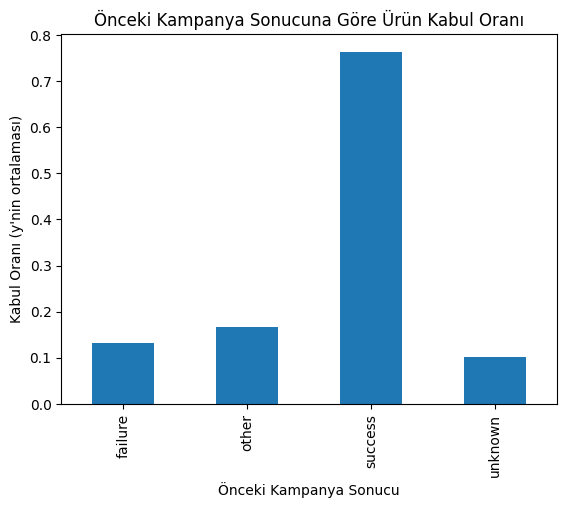

In [40]:
target_mean.plot(kind="bar")
plt.title("Önceki Kampanya Sonucuna Göre Ürün Kabul Oranı")
plt.ylabel("Kabul Oranı (y'nin ortalaması)")
plt.xlabel("Önceki Kampanya Sonucu")
plt.show()


In [41]:
def find_outliers_iqr(df, threshold = 1.5):
    outlier_summary = {}

    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[ (df[col] < lower_bound) | (df[col] > upper_bound)]
        
        outlier_summary[col] = {
            "outlier_count" : outliers.shape[0],
            "outlier_percentage" : 100 * outliers.shape[0] / df.shape[0],
            "lower_bound" : lower_bound,
            "upper_bound" : upper_bound
        }
    return pd.DataFrame(outlier_summary)

In [42]:
find_outliers_iqr(df,threshold=3)

,age,balance,day,campaign,pdays,previous,y
outlier_count,7.000000,24109.000000,0.0,18556.000000,77566.000000,77569.000000,90488.000000
outlier_percentage,0.000933,3.214533,0.0,2.474133,10.342133,10.342533,12.065067
lower_bound,-12.000000,-4170.000000,-27.0,-5.000000,-1.000000,0.000000,0.000000
upper_bound,93.000000,5560.000000,57.0,9.000000,-1.000000,0.000000,0.000000


In [43]:
df=df[df["campaign"]<=9]

In [44]:
# Negatif balance olanlar
negative_balance = df[df["balance"] < 0]

# Negatif balance olanlar arasında kampanyayı kabul edenler
negative_balance_accepted = negative_balance[negative_balance["y"] == 1]

# Kabul etme oranı
accept_rate = len(negative_balance_accepted) / len(negative_balance)
print(f"Negatif bakiyesi olanların kabul etme oranı: {accept_rate:.4f}")


Negatif bakiyesi olanların kabul etme oranı: 0.0246


In [45]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,1,-1,0,unknown,1


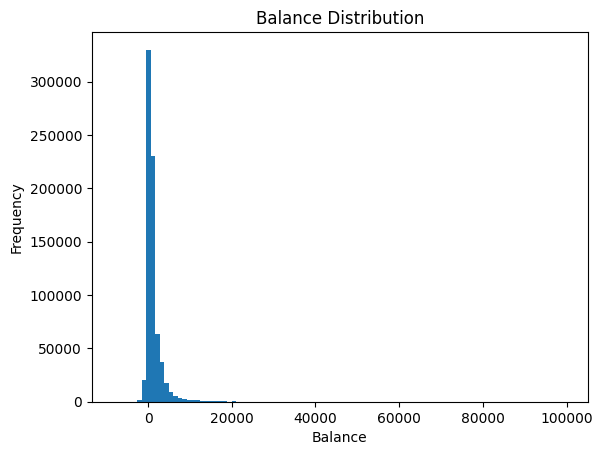

In [46]:
import matplotlib.pyplot as plt

plt.hist(df["balance"], bins=100)
plt.title("Balance Distribution")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.show()

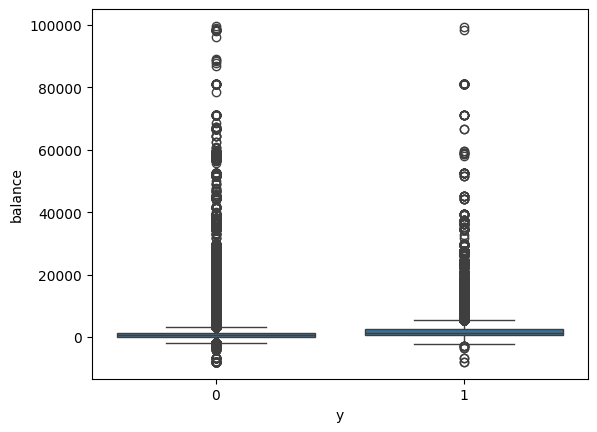

In [47]:
sns.boxplot(x="y", y="balance", data=df)
plt.show()


In [48]:
##yüzde kaçı 1 yüzde kaçı 0
df["y"].value_counts(normalize=True) * 100



y
0    87.737134
1    12.262866
Name: proportion, dtype: float64

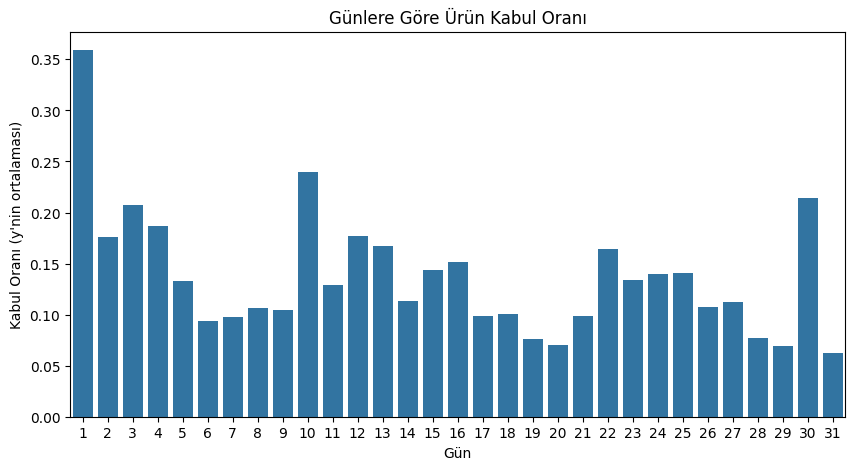

In [49]:
##günlere göre kabul oranı
day_mean = df.groupby("day")["y"].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=day_mean, x="day", y="y")
plt.title("Günlere Göre Ürün Kabul Oranı")
plt.xlabel("Gün")
plt.ylabel("Kabul Oranı (y'nin ortalaması)")
plt.show()

In [50]:
## binary encode
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['default'] = df['default'].map({'yes': 1, 'no': 0})


In [51]:
X=df.drop("y",axis=1)
y=df["y"]

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45,stratify=y)

In [53]:
## column transformation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

# 1. Kategorilerin sırasını belirleyelim (Ordinal için önemli)
education_order = ['unknown', 'primary', 'secondary', 'tertiary']
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
onehot_cols=['job', 'marital', 'contact', 'poutcome']
num_cols=['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

# 2. Transformer'ı oluşturalım
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=[education_order, month_order]) , ['education', 'month']),
        
        ('cat', OneHotEncoder(
            handle_unknown='ignore',     # Bilinmeyen kategori gelirse hata verme
            sparse_output=False          # Okunabilir tablo formatı
        ), onehot_cols),
        
        ('num', StandardScaler(), num_cols)
    ],
    remainder='passthrough' # 'default', 'housing', 'loan' gibi 0-1 kolonları direkt geçer
)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [54]:
encod_cols=preprocessor.get_feature_names_out()

In [55]:
X_train = pd.DataFrame(X_train, columns=encod_cols)
X_test = pd.DataFrame(X_test, columns=encod_cols) 

In [56]:
X_train.head()

,ord__education,ord__month,cat__job_admin.,cat__job_blue-collar,cat__job_entrepreneur,cat__job_housemaid,cat__job_management,cat__job_retired,cat__job_self-employed,cat__job_services,...,cat__poutcome_unknown,num__age,num__balance,num__day,num__campaign,num__pdays,num__previous,remainder__default,remainder__housing,remainder__loan
0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-0.783514,-0.015574,0.248108,-0.786543,-0.306117,-0.224709,0.0,1.0,0.0
1,3.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,-0.684714,0.165101,1.344930,2.339832,-0.306117,-0.224709,0.0,0.0,1.0
2,3.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,-0.289512,-0.415186,0.369978,0.464007,-0.306117,-0.224709,0.0,1.0,0.0
3,3.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,-0.091911,-0.168617,1.710537,-0.786543,-0.306117,-0.224709,0.0,0.0,0.0
4,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-0.882315,-0.758470,1.466799,-0.786543,-0.306117,-0.224709,0.0,1.0,0.0


In [57]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score
model = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    # 1. En kritik parametre:
    is_unbalance=True, 
    # VEYA is_unbalance yerine daha hassas kontrol için:
    # scale_pos_weight = (negatif_sayisi / pozitif_sayisi)
    
    # 2. Aşırı öğrenmeyi (Overfitting) engellemek için:
    max_depth=12,
    num_leaves=31,
    min_child_samples=20,
    
    # 3. Genelleme yeteneği için:
    reg_alpha=0.1,  # L1 Regülarizasyon
    reg_lambda=0.1, # L2 Regülarizasyon
    colsample_bytree=0.8,
    random_state=45,
    n_jobs=-1
)

model.fit(X_train, y_train)
# 1. Tahminleri Alalım
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 2. Olasılık Skorlarını Alalım (ROC-AUC için)
y_prob_train = model.predict_proba(X_train)[:, 1]
y_prob_test = model.predict_proba(X_test)[:, 1]

# 1. Tahminleri Alalım
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 2. Olasılık Skorlarını Alalım (ROC-AUC için)
y_prob_train = model.predict_proba(X_train)[:, 1]
y_prob_test = model.predict_proba(X_test)[:, 1]

print("--- EĞİTİM (TRAIN) SONUÇLARI ---")
print(classification_report(y_train, y_pred_train))
print("Train ROC AUC:", roc_auc_score(y_train, y_prob_train))

print("\n" + "="*40 + "\n")

print("--- TEST SONUÇLARI ---")
print(classification_report(y_test, y_pred_test))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob_test))

[LightGBM] [Info] Number of positive: 71757, number of negative: 513398
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 585155, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122629 -> initscore=-1.967766
[LightGBM] [Info] Start training from score -1.967766
--- EĞİTİM (TRAIN) SONUÇLARI ---
              precision    recall  f1-score   support

           0       0.96      0.82      0.89    513398
           1       0.38      0.77      0.51     71757

    accuracy                           0.82    585155
   macro avg       0.67      0.80      0.70    585155
weighted avg       0.89      0.82      0.84    585155

Train ROC AUC: 0.8868652460472625


--- TEST SONUÇLARI ---
              precisio

In [58]:
params = {
    "learning_rate": [0.1, 0.05,0.5,0.01],
    "max_depth": [5,7,8,10,12, 20, 30],
    "n_estimators": [100, 200, 300,500,800,1000],
    "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4],
    "min_child_samples": [20, 30, 50, 100]
}

In [59]:
## random search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    n_iter=50,  # Denenecek parametre kombinasyonu sayısı
    scoring='f1',  # Değerlendirme metriği
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=45,
    n_jobs=-1
)

In [ ]:
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    f1_score,
    auc
)

# ==============================
# 1️⃣ Modeli oluştur
# ==============================
model = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    is_unbalance=True,
    max_depth=12,
    min_child_samples=20,
    colsample_bytree=0.8,
    n_jobs=-1
)

# ==============================
# 2️⃣ Modeli eğit
# ==============================
model.fit(X_train, y_train)

# ==============================
# 3️⃣ Tahmin olasılıklarını al
# ==============================
y_prob_train = model.predict_proba(X_train)[:, 1]
y_prob_test = model.predict_proba(X_test)[:, 1]

# ==============================
# 4️⃣ PR Curve + PR AUC (TRAIN)
# ==============================
precision_train, recall_train, thresholds_train = precision_recall_curve(
    y_train, y_prob_train
)

pr_auc_train = auc(recall_train, precision_train)

# F1'e göre en iyi threshold
f1_scores = 2 * (precision_train[:-1] * recall_train[:-1]) / (
    precision_train[:-1] + recall_train[:-1] + 1e-8
)

best_idx = np.argmax(f1_scores)
best_threshold = thresholds_train[best_idx]

print(f"Optimal threshold for F1: {best_threshold:.3f}")
print(f"Best F1 score on train: {f1_scores[best_idx]:.3f}")

# ==============================
# 5️⃣ TEST PR AUC
# ==============================
precision_test, recall_test, _ = precision_recall_curve(
    y_test, y_prob_test
)

pr_auc_test = auc(recall_test, precision_test)

# ==============================
# 6️⃣ Yeni threshold ile sınıflandır
# ==============================
y_pred_train_opt = (y_prob_train >= best_threshold).astype(int)
y_pred_test_opt = (y_prob_test >= best_threshold).astype(int)

# ==============================
# 7️⃣ Sonuçları değerlendir
# ==============================
print("\n--- EĞİTİM (TRAIN) SONUÇLARI ---")
print(classification_report(y_train, y_pred_train_opt))
print("Train ROC AUC:", roc_auc_score(y_train, y_prob_train))
print("Train PR AUC:", pr_auc_train)
print("Train F1:", f1_score(y_train, y_pred_train_opt))

print("\n" + "="*40 + "\n")

print("--- TEST SONUÇLARI ---")
print(classification_report(y_test, y_pred_test_opt))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob_test))
print("Test PR AUC:", pr_auc_test)
print("Test F1:", f1_score(y_test, y_pred_test_opt))


[LightGBM] [Info] Number of positive: 71757, number of negative: 513398
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 585155, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122629 -> initscore=-1.967766
[LightGBM] [Info] Start training from score -1.967766


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, f1_score
import numpy as np

# ==============================
# 1️⃣ Modeli oluştur
# ==============================
xgb = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    is_unbalance=True, 
    max_depth=12,
    num_leaves=31,
    min_child_samples=20,
    reg_alpha=0.1,
    reg_lambda=0.1,
    colsample_bytree=0.8,
    random_state=45,
    n_jobs=-1
    
)

# ==============================
# 2️⃣ Modeli eğit
# ==============================
xgb.fit(X_train, y_train)

# ==============================
# 3️⃣ Tahmin olasılıklarını al
# ==============================
y_prob_train = xgb.predict_proba(X_train)[:, 1]
y_prob_test = xgb.predict_proba(X_test)[:, 1]

# ==============================
# 4️⃣ Optimal threshold hesapla (F1 maks.)
# ==============================
precision, recall, thresholds = precision_recall_curve(y_train, y_prob_train)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Optimal threshold for F1: {best_threshold:.3f}")
print(f"Best F1 score on train: {f1_scores[best_idx]:.3f}")

# ==============================
# 5️⃣ Yeni threshold ile sınıflandır
# ==============================
y_pred_train_opt = (y_prob_train >= best_threshold).astype(int)
y_pred_test_opt = (y_prob_test >= best_threshold).astype(int)

# ==============================
# 6️⃣ Sonuçları değerlendir
# ==============================
print("\n--- EĞİTİM (TRAIN) SONUÇLARI ---")
print(classification_report(y_train, y_pred_train_opt))
print("Train ROC AUC:", roc_auc_score(y_train, y_prob_train))
print("Train F1:", f1_score(y_train, y_pred_train_opt))

print("\n" + "="*40 + "\n")

print("--- TEST SONUÇLARI ---")
print(classification_report(y_test, y_pred_test_opt))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob_test))
print("Test F1:", f1_score(y_test, y_pred_test_opt))


c:\Users\ahmet\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\xgboost\training.py:200: UserWarning: [14:49:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "is_unbalance", "min_child_samples", "num_leaves" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Optimal threshold for F1: 0.305
Best F1 score on train: 0.857

--- EĞİTİM (TRAIN) SONUÇLARI ---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    513398
           1       0.88      0.84      0.86     71757

    accuracy                           0.97    585155
   macro avg       0.93      0.91      0.92    585155
weighted avg       0.97      0.97      0.97    585155

Train ROC AUC: 0.9863103108834511
Train F1: 0.8565348719303633


--- TEST SONUÇLARI ---
              precision    recall  f1-score   support

           0       0.93      0.94      0.94    128350
           1       0.54      0.47      0.50     17939

    accuracy                           0.89    146289
   macro avg       0.73      0.71      0.72    146289
weighted avg       0.88      0.89      0.88    146289

Test ROC AUC: 0.8339654149337365
Test F1: 0.5043972639246691


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,prediction_probability,predicted_class
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown,0.216243,0
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown,0.384316,0
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown,0.382364,0
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown,0.001172,0
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown,0.680017,0


predicted_class
0    217546
1     32454
Name: count, dtype: int64

(250000, 19)